# Handwriting Recognition
---
Ken Luo - 300706047

Danny Padilla - 304542295

## Question 1
---

** a. ** Download the dataset "Digit" from CSNS. Check out the dataset. It includes 1797 small images (8 x 8 pixels), each one includes a hand-written digit (0 - 9). You have to download the corresponding CSV file that includes the labels of the images. The goal is to build a Machine Learning Algorithm that can recognize the hand-written digits.

Import the following two libraries to work with images:

**`
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
`**

You can use:

  **` plimg.imread(file_name) `**

to lead an image and,

  **` plt.imshow(image_name, cmap=plt.cm.gray_r,interpolation="nearest") `**

to show an image

Add **` %matplotlib inline `** at the top of your code to make sure that the images will be shown inside the Jupyter explorer page.

In [99]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


In [68]:
test = np.array(mpimg.imread('./Digit/0.jpg'))

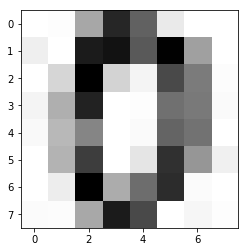

In [38]:
plt.imshow(test, cmap=plt.cm.gray_r, interpolation='nearest')


** b. ** Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. This, to build the feature table you have to convert each 8 x 8 image into a row of the feature matrix with 64 feature columns for 64 pixels.

In [133]:
labels = pd.read_csv('label.csv')
labels.head()
y = labels['digit']

print(y.head())
y.shape
print(labels.head())
print(labels.digit[10])


0    0
1    1
2    2
3    3
4    4
Name: digit, dtype: int64
   name of the file  digit
0                 0      0
1                 1      1
2                 2      2
3                 3      3
4                 4      4
0


In [171]:
iterator = []

for x in range(0, 1797):
    iterator.append(mpimg.imread('./Digit/'+ str(x) + '.jpg').flatten())
print(iterator[0])
na = np.array(iterator)
print(na[0])
#print(na[:5])
na.shape

[  0   2  88 217 158  21   0   0  16   0 228 236 166 253  95   0   0  41
 255  44  11 182 132   3  11  80 220   0   2 143 133   5   6  71 122   0
   5 155 140   0   0  76 194   0  26 207 105  15   0  18 255  83 146 211
   4   0   4   3  87 228 182   0   9   2]
[  0   2  88 217 158  21   0   0  16   0 228 236 166 253  95   0   0  41
 255  44  11 182 132   3  11  80 220   0   2 143 133   5   6  71 122   0
   5 155 140   0   0  76 194   0  26 207 105  15   0  18 255  83 146 211
   4   0   4   3  87 228 182   0   9   2]


(1797, 64)

** c. ** Use sklearn functions to split the dataset into testing and training sets with the following parameters: **`test_size = 0.1, random_state = 2`**.

In [106]:
x_train, x_test, y_train, y_test = train_test_split(na, y, test_size = 0.1, random_state = 2)

In [107]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1617, 64)
(180, 64)
(1617,)
(180,)


** d. ** Use scikit-learn "Random Forest" classifier to recognize the hand-written digits based on the training/testing datasets that you built in part ** (c) **. Use this command to import and define your classifier:

**`from sklearn.ensemble import RandomForestClassifier`**

**`my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 2)`**

Use **`my_RandomForest.fit`** for training your random forest classifier and **`my_RandomForest.predict`** for prediction. Test your Machine Learning Algorithm on testing set __*(from part (c) )*__, and calculate and report the __*accuracy*__

In [108]:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 2)

In [109]:
my_RandomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [110]:
y_predict = my_RandomForest.predict(x_test)

In [111]:
# test/calculate/report accuracy
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.927777777778


** e. ** Find exactly which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set. Then, use the following command to show the misclassified images:

**`plt.imshow(image_name, cmap = plt.cm.gray, interpolation = "nearest")`**

In [175]:
misclassified = np.where(y_test != my_RandomForest.predict(x_test))
print(misclassified)
list = []

print(na[0])
for i in misclassified:
    print(na[i][0])
#    list.append(na[i].reshape((8,8)))
print(list)
for i in misclassified:
#    temp = na[i].reshape((8,8))
    plt.figure()
#    plt.imshow(temp, cmap = plt.cm.gray, interpolation = "nearest")
    


(array([  4,  16,  41,  44,  45,  49,  63,  66, 115, 130, 137, 165, 174]),)
[  0   2  88 217 158  21   0   0  16   0 228 236 166 253  95   0   0  41
 255  44  11 182 132   3  11  80 220   0   2 143 133   5   6  71 122   0
   5 155 140   0   0  76 194   0  26 207 105  15   0  18 255  83 146 211
   4   0   4   3  87 228 182   0   9   2]
[  0   6   0  34 160   7   7   0   5   0   9 109 119   0   0   7   0  10
   9 202 109  34  27   0   0   9 106 241   2 128 139   2   0  99 255 154
   0 255  99   0   3  44 244 255 213 244   0  12   0  13   0  30 254 173
   7   0   0   0   2  42 250  51   0   4]
[]


In [ ]:
for i in misclassified:
    plt.imshow(i, cmap = plt.cm.gray, interpolation = "nearest")

## Question 2
---
No coding needed

Suppose we have a dataset with 3 features: X1 = GPA, X2 = Age, X3 = Type of Position (1 for Technical positions, and 0 for Non-Technical positions), and we have built a non-linear regression model as:

**`Target = 𝜃0 + 𝜃1𝑋1 + 𝜃2𝑋2 + 𝜃3𝑋3+ 𝜃4𝑋1𝑋2 + 𝜃5𝑋1𝑋3`**

The prediction target is “starting salary after graduation” (in thousands of dollars). Suppose we train (fit) the model, and get **`𝜃0 = 30, 𝜃1 = 20, 𝜃2 = 0.07, 𝜃3 = -30, 𝜃4 = 0.01, 𝜃5 = 10`**.

** a. ** Which answer is correct, and why?

  1. For a fixed value of Age and GPA, Technical positions earn more on average than non- technical positions.
  2. For a fixed value of Age and GPA, Non-Technical positions earn more on average than Technical positions.
  3. For a fixed value of Age and GPA, Technical positions earn more on average than Non-Technical positions when the GPA is high enough.
  4. For a fixed value of Age and GPA, Non-Technical positions earn more on average than Technical positions when the GPA is high enough.

__ANSWER:__

__For a fixed value of Age and GPA, Non-Technical positions earn more on average than Technical positions.__

__Because 𝜃3𝑋3 has a larger effect than 𝜃5𝑋1𝑋3__

** b. ** Predict the salary of a Technical and a Non-Technical positions with Age of 27, GPA of 4.0.

In [14]:
# Technical:
technical = 30 + 20*(4.0) + 0.07*(27) - 30*(1) + 0.01*(4.0)*(27) + 10*(4.0)*(1)
print("Technical Salary:     ", technical)
## Technical Salary = 122.97

# Non-Technical:
non_technical = 30 + 20*(4.0) + 0.07*(27) - 30*(0) + 0.01*(4.0)*(27) + 10*(4.0)*(0)
print("Non-Technical Salary: ", non_technical)
## Non-Technical Salary = 122.97

Technical Salary:      122.97
Non-Technical Salary:  112.97


## Question 3
---
No coding needed

Suppose that we would like to perform the following task using MapReduce. Please determine the input/output of each mapper and reducer and all intermediate key-value pairs generated in the process of MapReduce:

- Matrix-to-Vector multiplication using MapReduce with 4 mappers and 2 reducers:

```
                   _   _
 _            _   |  3  |
| 5  -3   3  7 |  |  7  |
|_4   2  -8  6_|  | -9  |
                  |_ 2 _|
                   
```

In [ ]:
'''

MAPPER:
((0, 0),  5) -> (0,  5 *  3) =  15
((0, 1), -3) -> (0, -3 *  7) = -21
((0, 2),  3) -> (0,  3 * -9) = -27
((0, 3),  7) -> (0,  7 *  2) =  14

((1, 0),  4) -> (1,  4 *  3) =  12
((1, 1),  2) -> (1,  2 *  7) =  14
((1, 2), -8) -> (1, -8 * -9) =  72
((1, 3),  6) -> (1,  6 *  2) =  12


REDUCE
(0, [15 - 21 - 27 + 14] ) = -19
(1, [12 + 14 + 72 + 12] ) = 110

ANSWER: [ -19  110]

'''